<a href="https://colab.research.google.com/github/JARACH-209/AI-ML_Lab/blob/master/ML_Poject_EDA_RF_SHFvsDHF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/dat.csv")
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df.drop(columns=['NYHA.cardiac.function.classification','DestinationDischarge','admission.ward','admission.way','inpatient.number','consciousness','eye.opening','erythrocyte.sedimentation.rate','ageCat'],inplace=True)

In [ ]:
df.drop(columns=['apolipoprotein.A','apolipoprotein.B','verbal.response','movement','respiratory.support.','oxygen.inhalation','discharge.department'],inplace=True)

In [ ]:
df.shape

(2008, 150)

In [ ]:
len(df.loc[df['congestive.heart.failure'] == 1])    # 1872 Patients had congestive heart failure

1872

In [ ]:
chf_corr = sorted(abs(df.corr()['congestive.heart.failure']).items(),key = lambda kv: kv[1],reverse=True)[:10]
chf_corr

[('congestive.heart.failure', 1.0),
 ('leukemia', nan),
 ('EA', 0.5304830043529579),
 ('CCI.score', 0.3018254879254003),
 ('cerebrovascular.disease', 0.1571027713704445),
 ('myoglobin', 0.1492432208217126),
 ('moderate.to.severe.chronic.kidney.disease', 0.13600221538391113),
 ('death.within.6.months', 0.10906740032518758),
 ('tricuspid.valve.return.pressure', 0.08922311994442841),
 ('LVEF', 0.08622530444045182)]

* EA > 0 : 393   (Important for Diastolic HF)
    * EMS : 980
    * AMS : 550
* MAP ( Mean Arterial Pressure) >110 : 319
    * Mean MAP with EF > 50 : 98.13
    * Mean MAP with EF < 40 : 92.44
    * Number of patients with MAP > 110
        * EF > 40 : 101
        * EF < 40 : 19
        * EF > 50 : 70
* LVEF > 0 : 635
* MyoInfa : 143

In [ ]:
len(df.loc[df['congestive.heart.failure']==1].loc[df['LVEF'] >50]['mitral.valve.EMS'].loc[df['EA']>0])

111

In [ ]:
len(df.loc[df['LVEF']>60].loc[df['congestive.heart.failure']==1].loc[df.map>110])

33

In [ ]:
len(df.loc[df['congestive.heart.failure']==1].loc[df['LVEF'] <40].loc[df.map>110])

19

In [ ]:
#Map of people having CHF and EF<45
len(df.loc[df['congestive.heart.failure']==1].loc[df.LVEF <45].loc[df.map > 110])

28

In [ ]:
ra_corr = sorted(abs(df.corr().EA).items(),key = lambda kv: kv[1],reverse=True)

In [ ]:
ra_corr

[('connective.tissue.disease', nan),
 ('hemiplegia', nan),
 ('leukemia', nan),
 ('malignant.lymphoma', nan),
 ('EA', 1.0),
 ('tricuspid.valve.return.pressure', 1.0),
 ('congestive.heart.failure', 0.5304830043529579),
 ('time.of.death..days.from.admission.', 0.454265836538509),
 ('lipoprotein', 0.3433058584167551),
 ('re.admission.time..days.from.admission.', 0.2482452130013647),
 ('time.to.emergency.department.within.6.months', 0.2482452130013647),
 ('LVEF', 0.20585386911196504),
 ('myocardial.infarction', 0.175962824013606),
 ('myoglobin', 0.15239589749649518),
 ('white.globulin.ratio', 0.13349144592028936),
 ('prothrombin.activity', 0.12367700439262552),
 ('high.sensitivity.protein', 0.1152849487736945),
 ('serum.magnesium', 0.11482094094793562),
 ('systolic.blood.pressure', 0.10825591601906842),
 ('calcium', 0.10760239364947947),
 ('CCI.score', 0.10080333599499468),
 ('hemoglobin', 0.09226729558460069),
 ('mean.platelet.volume', 0.09055019213200781),
 ('eosinophil.count', 0.08799769

------

In [ ]:
temp_s = "pulse respiration systolic.blood.pressure diastolic.blood.pressure map weight height BMI type.of.heart.failure NYHA.cardiac.function.classification Killip.grade myocardial.infarction congestive.heart.failure peripheral.vascular.disease cerebrovascular.disease dementia Chronic.obstructive.pulmonary.disease connective.tissue.disease peptic.ulcer.disease diabetes moderate.to.severe.chronic.kidney.disease hemiplegia leukemia"
temp = "liver.disease AIDS CCI.score type.II.respiratory.failure consciousness fio2 acute.renal.failure LVEF left.ventricular.end.diastolic.diameter.LV mitral.valve.EMS mitral.valve.AMS EA tricuspid.valve.return.velocity tricuspid.valve.return.pressure"
temp = temp.split(" ")
feature_names = temp_s.split(" ")
feature_names.extend(temp)

# feature names to be used

In [ ]:
df_og = df
df = df[feature_names]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   pulse                                       2008 non-null   int64  
 1   respiration                                 2008 non-null   int64  
 2   systolic.blood.pressure                     2008 non-null   int64  
 3   diastolic.blood.pressure                    2008 non-null   int64  
 4   map                                         2008 non-null   float64
 5   weight                                      2008 non-null   float64
 6   height                                      2008 non-null   float64
 7   BMI                                         2008 non-null   float64
 8   type.of.heart.failure                       2008 non-null   object 
 9   NYHA.cardiac.function.classification        2008 non-null   object 
 10  Killip.grade

In [ ]:
df.dropna(subset= feature_names[:29], inplace = True)       #dropping all the null values except index >29

In [ ]:
df.loc[df["CCI.score"].isnull() == True].index.to_list()        #finds the index of null values

[467, 743, 817, 1003, 1497]

In [ ]:
df.drop(columns = "consciousness",inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003 entries, 0 to 2007
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   pulse                                       2003 non-null   int64  
 1   respiration                                 2003 non-null   int64  
 2   systolic.blood.pressure                     2003 non-null   int64  
 3   diastolic.blood.pressure                    2003 non-null   int64  
 4   map                                         2003 non-null   float64
 5   weight                                      2003 non-null   float64
 6   height                                      2003 non-null   float64
 7   BMI                                         2003 non-null   float64
 8   type.of.heart.failure                       2003 non-null   object 
 9   NYHA.cardiac.function.classification        2003 non-null   object 
 10  Killip.grade

In [ ]:
df["type.of.heart.failure"].unique()
replace_values = {'Both' : 3, 'Right': 1, 'Left': 2}
df.replace({'type.of.heart.failure' : replace_values}, inplace =True)

In [ ]:
df['Killip.grade'].unique()
replace_values = {'III' : 3, 'I': 1, 'II': 2,'IV': 4}
df.replace({'Killip.grade' : replace_values}, inplace =True)

In [ ]:
df['NYHA.cardiac.function.classification'].unique()
replace_values = {'III' : 3, 'I': 1, 'II': 2,'IV': 4}
df.replace({'NYHA.cardiac.function.classification' : replace_values}, inplace =True)

In [ ]:
df['type.II.respiratory.failure'].unique()
df['type.II.respiratory.failure'].replace(to_replace = 'NonTypeII', value = 0, inplace = True)
df['type.II.respiratory.failure'].replace(to_replace = 'TypeII', value = 1, inplace = True)

In [ ]:
df.info()       # All the data is ordinal or continuous now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003 entries, 0 to 2007
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   pulse                                       2003 non-null   int64  
 1   respiration                                 2003 non-null   int64  
 2   systolic.blood.pressure                     2003 non-null   int64  
 3   diastolic.blood.pressure                    2003 non-null   int64  
 4   map                                         2003 non-null   float64
 5   weight                                      2003 non-null   float64
 6   height                                      2003 non-null   float64
 7   BMI                                         2003 non-null   float64
 8   type.of.heart.failure                       2003 non-null   int64  
 9   NYHA.cardiac.function.classification        2003 non-null   int64  
 10  Killip.grade

In [ ]:
df['brain.natriuretic.peptide'] = df_og['brain.natriuretic.peptide']

### Attempt to predict CHF with limited data

Preserving :
* LVEF
* LV End Diastolic Diameter
* brain.natriuretic.preptide

In [ ]:
len(df.loc[df['brain.natriuretic.peptide']>0].loc[df['LVEF'] > 0].loc[df['left.ventricular.end.diastolic.diameter.LV']>0])

587

In [ ]:
df_chf = df.dropna(subset = ["brain.natriuretic.peptide",'LVEF','left.ventricular.end.diastolic.diameter.LV'])

In [ ]:
df_chf.dropna(axis=1,inplace = True)   #droping the whole features having null values

In [ ]:
df_chf.columns

In [ ]:
Y = df_chf['congestive.heart.failure'].to_numpy()
X = pd.DataFrame(df_chf.drop(columns = ['dementia','type.of.heart.failure','weight','height','congestive.heart.failure','peptic.ulcer.disease'])).to_numpy()

In [ ]:
df_X = pd.DataFrame(df_chf.drop(columns = ['dementia','type.of.heart.failure','weight','height','congestive.heart.failure','peptic.ulcer.disease']))

In [ ]:
X.shape

(587, 26)

In [ ]:
Y.shape

(587,)

In [ ]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

Y.reshape(-1)

In [ ]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
df_chf.to_csv("All_CHF_Dataframe.csv")

Two paths :
* Predict Type of HF without LVEF

        Class 0 : HFrEF ; EF < 40
        Class 1 : HFpEF ; EF > 40

* Predcit CHF without LVEF

Predicting the type HF

In [ ]:
df_lvef = df_chf
df_lvef['LVEF'].clip(40,41,inplace = True)         #Classifying the LVEF in two categories

* EF <= 40 as 0
* EF > 40 as 1

In [ ]:
df_lvef['LVEF'].replace(to_replace=40,value=int(0),inplace=True)
df_lvef['LVEF'].replace(to_replace=41,value=int(1),inplace=True)

We drop the CHF variable as well because all are 1.
Also we wish to diagnose the early signs hence it is a target variable.

In [ ]:
Y = df_lvef['LVEF'].to_numpy()
X = pd.DataFrame(df_lvef.drop(columns = ['LVEF','dementia','type.of.heart.failure','weight','height','congestive.heart.failure','peptic.ulcer.disease'])).to_numpy()

In [ ]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
Y = Y.astype(int)
Y = Y.reshape(-1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.148)

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = preprocessing.StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)

RandomSearch CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap} 

In [ ]:
clf = RandomForestClassifier()
rf_rscv = RandomizedSearchCV(estimator=clf,param_distributions = random_grid,n_iter = 100,cv = 5)
rf_rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_rscv.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 1333}

Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 60,70,80],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [2,3,4],
    'n_estimators': [900,1000,1333,1400]
}
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 20.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 1333}

In [ ]:
clf = RandomForestClassifier(n_estimators=1333,bootstrap=True,max_depth=80, max_features='sqrt', min_samples_split= 4, min_samples_leaf=3).fit(x_train,y_train)
y_predicted = clf.predict(x_test)


In [ ]:
y_train_pred = clf.predict(x_train)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))

Accuracy Test 88.51
Accuracy Train 94.40


Visualizations

In [ ]:
df_xtest = pd.DataFrame(x_train)
df_xtrain.shape

(500, 25)

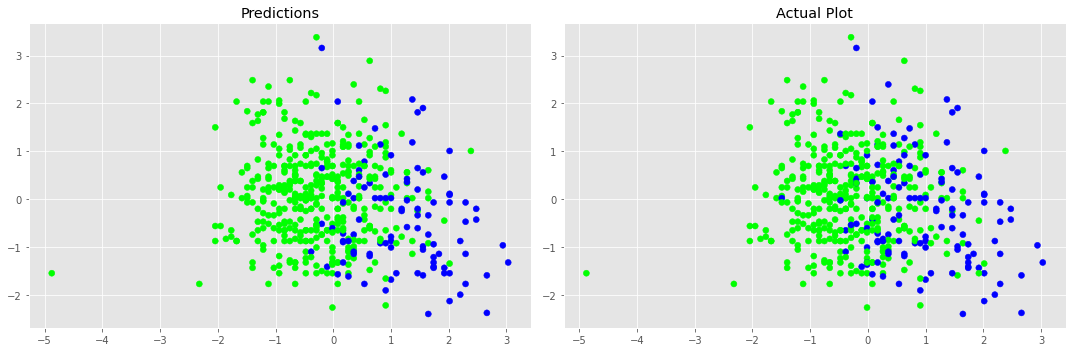

In [ ]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(df_xtrain.iloc[:,23],df_xtrain.iloc[:,4],c=y_train_pred,cmap='brg')
axes[1].scatter(df_xtrain.iloc[:,23],df_xtrain.iloc[:,4],c=y_train,cmap='brg')
axes[0].title.set_text("Predictions")
axes[1].title.set_text("Actual Plot")
fig.tight_layout()

Importand Features :
* BNP
* left.ventricular.end.diastolic.diameter.LV